In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

column_names = [
    "age", "workclass", "fnlwgt", "education", "educationNum", "maritalStatus",
    "occupation", "relationship", "race", "sex", "capitalGain", "capitalLoss",
    "hoursPerWeek", "nativeCountry", "income"
]

try:
    df = pd.read_csv("adult.csv", header=None, names=column_names)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("File not found. Please make sure 'adult.csv' is in your working directory.")

# Display the first few rows
print(df.head())

# Check data types and missing values
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())


Dataset loaded successfully.
   age          workclass  fnlwgt   education  educationNum  \
0   39          State-gov   77516   Bachelors            13   
1   50   Self-emp-not-inc   83311   Bachelors            13   
2   38            Private  215646     HS-grad             9   
3   53            Private  234721        11th             7   
4   28            Private  338409   Bachelors            13   

         maritalStatus          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capitalGain  capitalLoss  hoursPerWeek   nativeCountry  income  
0         2174            0            40   Unite

In [2]:
# Remove leading/trailing whitespaces and replace '?' with NaN
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
df.replace('?', pd.NA, inplace=True)

# Check missing values again
print("\nMissing values after cleaning:\n", df.isnull().sum())

# Drop rows with missing values
df.dropna(inplace=True)
print("\nData shape after dropping missing values:", df.shape)



Missing values after cleaning:
 age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

Data shape after dropping missing values: (30162, 15)


In [6]:
# Basic statistics
print("\nSummary Statistics:\n", df.describe())

# Group by 'education' and get mean age
education_group = df.groupby("education")["age"].mean().sort_values()
print("\nAverage age by education:\n", education_group)

# Group by 'income' and get the mean hours worked
income_group = df.groupby("income")["hoursPerWeek"].mean()
print("\nAverage hours per week by income:\n", income_group)



Summary Statistics:
                 age        fnlwgt  educationNum   capitalGain   capitalLoss  \
count  32561.000000  3.256100e+04  32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05     10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05      2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04      1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05      9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05     10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05     12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06     16.000000  99999.000000   4356.000000   

       hoursPerWeek  
count  32561.000000  
mean      40.437456  
std       12.347429  
min        1.000000  
25%       40.000000  
50%       40.000000  
75%       45.000000  
max       99.000000  

Average age by education:
 education
 12th            32.000000
 11

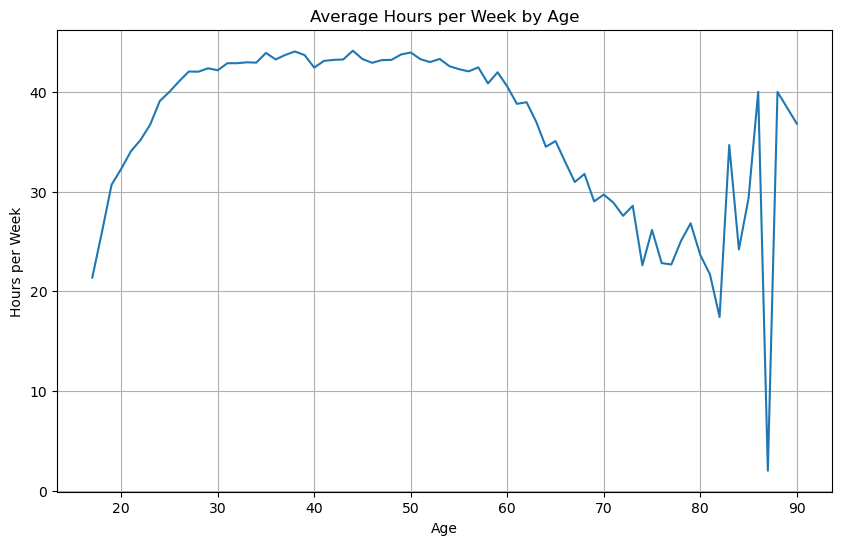

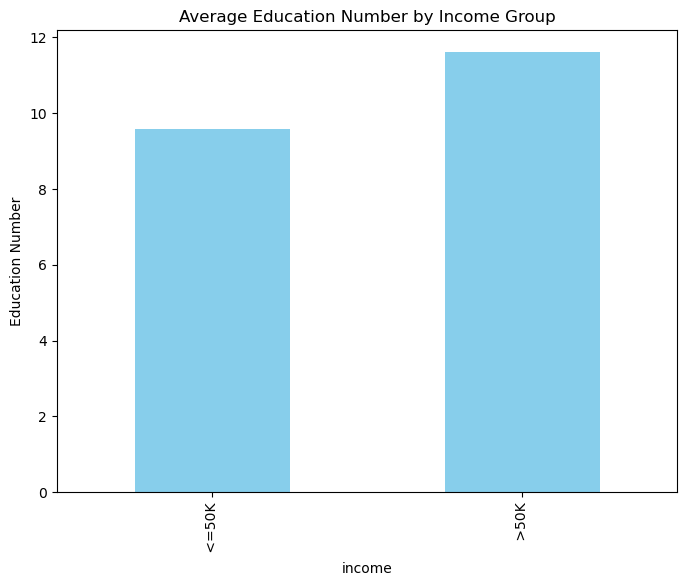

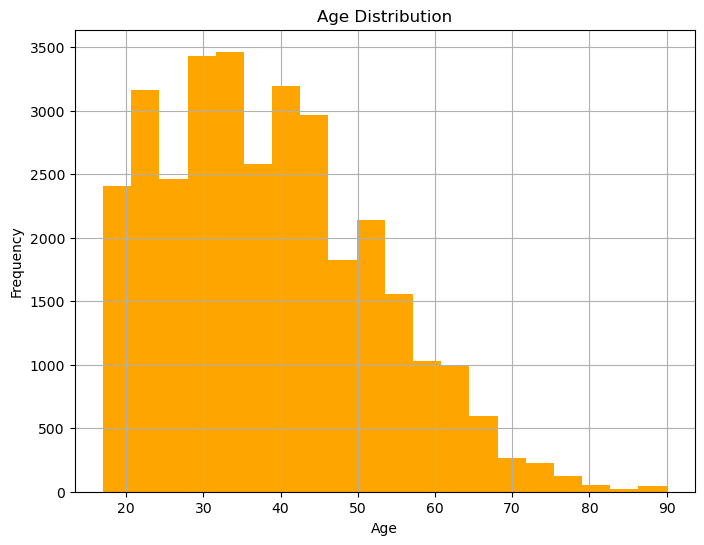

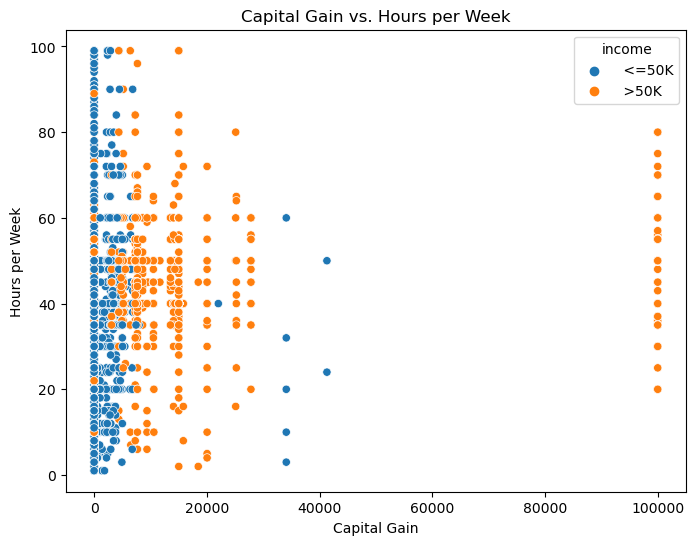

In [7]:
plt.figure(figsize=(10, 6))
# Line chart: average hours worked by age
df.groupby("age")["hoursPerWeek"].mean().plot(kind='line')
plt.title("Average Hours per Week by Age")
plt.xlabel("Age")
plt.ylabel("Hours per Week")
plt.grid(True)
plt.show()

# Bar chart: average education number by income group
plt.figure(figsize=(8, 6))
df.groupby("income")["educationNum"].mean().plot(kind='bar', color='skyblue')
plt.title("Average Education Number by Income Group")
plt.ylabel("Education Number")
plt.show()

# Histogram: age distribution
plt.figure(figsize=(8, 6))
df["age"].hist(bins=20, color='orange')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Scatter plot: capital gain vs hours per week
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="capitalGain", y="hoursPerWeek", hue="income")
plt.title("Capital Gain vs. Hours per Week")
plt.xlabel("Capital Gain")
plt.ylabel("Hours per Week")
plt.show()


In [8]:
print("""
Findings:
- People with higher education levels tend to be older.
- People earning >50K work slightly more hours per week on average.
- The age distribution is right-skewed (more younger adults).
- Higher capital gain is somewhat associated with longer working hours, especially among those earning >50K.
""")



Findings:
- People with higher education levels tend to be older.
- People earning >50K work slightly more hours per week on average.
- The age distribution is right-skewed (more younger adults).
- Higher capital gain is somewhat associated with longer working hours, especially among those earning >50K.

